# Математическая статистика (ФБМФ, ФМХФ)
## Домашнее задание 1

**Правила:**

* Дедлайн **5 апреля 17:05** по задачам 1-2 и **8 апреля 23:59** по задачам 3-6. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Решения задач 1-2 нужно принести к началу лекции.
* Решения задая 3-6 нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[ms] Фамилия Имя - задание 1"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `1.N.ipynb` и `1.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.
* Каждая задача стоит **1 балл**.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

### Задача 1
Пусть $X_1, ..., X_n$ --- выборка пуассоновского распределения $Pois(\theta)$, то есть $\mathsf{P}(X_i = k) = \frac{\theta^k}{k!} e^{-\theta}$ при $k \in \{0, 1, 2, ...\}$. 
* Найдите оценку $\theta$ по методу моментов;
* Найдите оценку $\theta$ по методу максимального правдоподобия;
* Проверьте полученные оценки на несмещенность и состоятельность.

-----

### Задача 2
Дана выборка $X_1, ..., X_n$ из нормального распределения $\mathcal{N}(a, \sigma^2)$. Найдите оценку максимального правдоподобия параметра $\theta = (a, \sigma)$. Оценку для $a$ проверьте на несмещенность и состоятельность.

-----


### Задача 3
В этой задаче нужно визуализировать *свойство состоятельности*.

Пусть $X_1, ..., X_n$ --- выборка из распределения $U(0, \theta)$. Известно, что оценки $\theta^* = 2\overline{X}, \widehat{\theta} = \max_i X_i$ являются состоятельными оценками $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок, посчитав по каждой из них указанные выше оценки параметра $\theta$ в зависимости от размера выборки и визуализировав их состоятельность.

Сгенерируйте множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leqslant j \leqslant 300$.<br>
По каждой из них посчитайте оценки  $\theta^*_{jn} = 2\frac{X^j_1 + \dots + X^j_n}{n}$, $\widehat{\theta}_{jn} = \max(X^j_1, \dots, X^j_n)$ для $1 \leqslant n \leqslant 500$,  то есть оценки параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки. При написании кода могут помочь функции `numpy.cumsum(axis=...)` и `np.maximum.accumulate(axis=...)`.

In [2]:
a = np.random.uniform(0, 1, (300, 500))
b = 2*np.cumsum(a, axis = 1, dtype = float)
for i in range(len(b)):
    for j in range(len(b[i])):
        b[i][j] =  b[i][j]/(j+1)
с = np.maximum.accumulate(a, axis = 1)


Для каждой оценки $\theta^*, \widehat{\theta}$ нарисуйте следующий график. Для каждого $j$ нанесите на один график зависимости $\theta^*_{jn}$ или $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Поскольку при малых $n$ значения средних могут быть большими по модулю, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

In [1]:
plt.figure(figsize=(15, 6))
for i in range(300):
    plt.plot(b[i], alpha = 0.05, color = 'red')
plt.grid()
plt.xlabel('Размер выборки', fontsize=14)
plt.ylabel('Удвоенное выборочное среднее', fontsize=14)
plt.xticks(range(0, 500, 50));
plt.ylim(0.5 , 1.5)

plt.figure(figsize=(15, 6))
for i in range(300):
    plt.plot(z[i], alpha = 0.05, color = 'green')
plt.grid()
plt.xlabel('Размер выборки', fontsize=14)
plt.ylabel('Выборочный максимум', fontsize=14)
plt.xticks(range(0, 500, 50));

NameError: name 'plt' is not defined

Сделайте вывод о смысле свойства состоятельности. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод: **Как видим, графики при увеличении выборки сходятся по вероятности к истинному параметру(матожиданию), то есть являются состоятельными, что подтверждается теорией с семинара

__________________
### Задача 4
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде *python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества*. Вы можете их копировать прямо в код, как в одном из примеров ниже.

Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [4]:
def draw_likelihood(density_function, grid, samples, label):
    assert len(samples) == 3
    plt.figure(figsize = (18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample).reshape((1, -1))
        
        likelihood = density_function(sample).prod(axis=1)
        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label+', sample='+str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

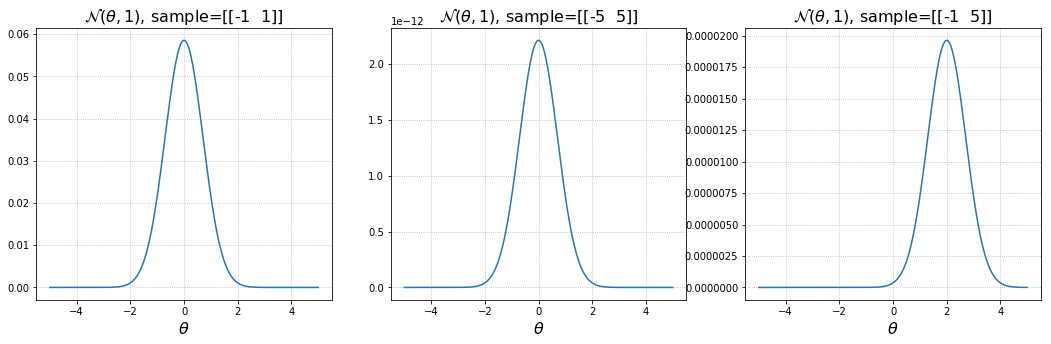

In [5]:
grid=np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

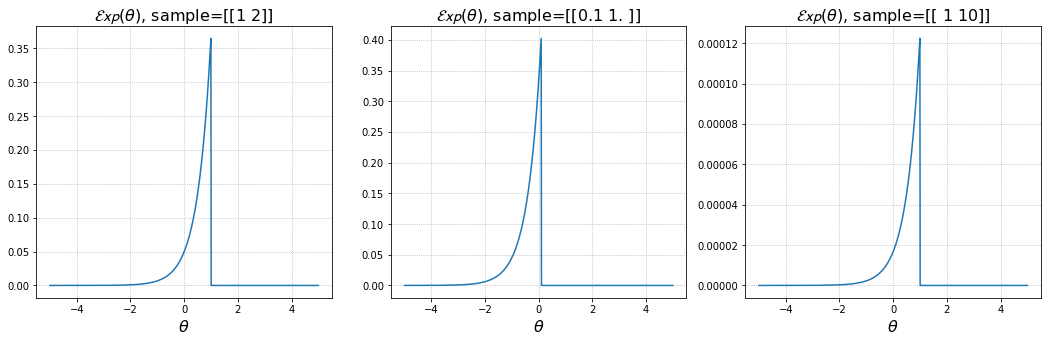

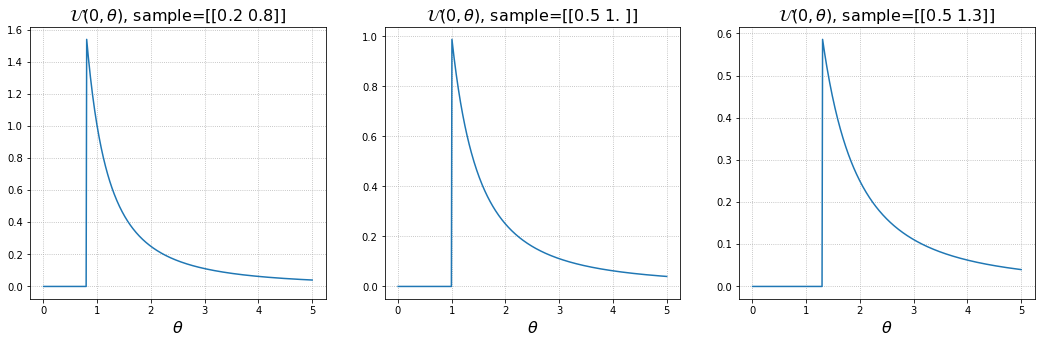

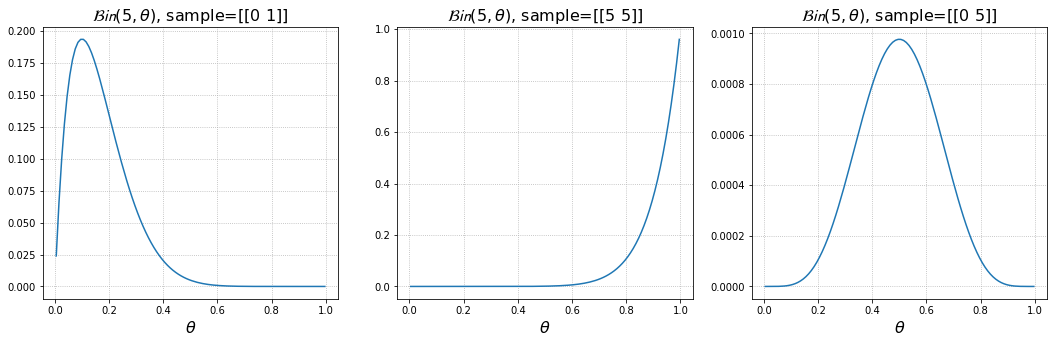

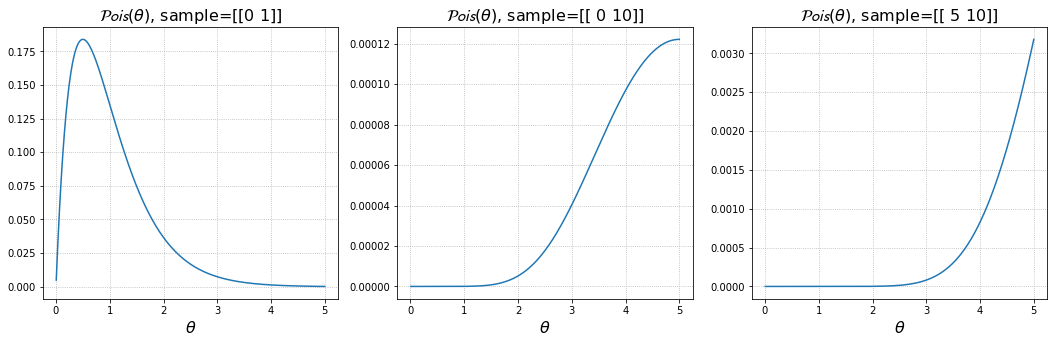

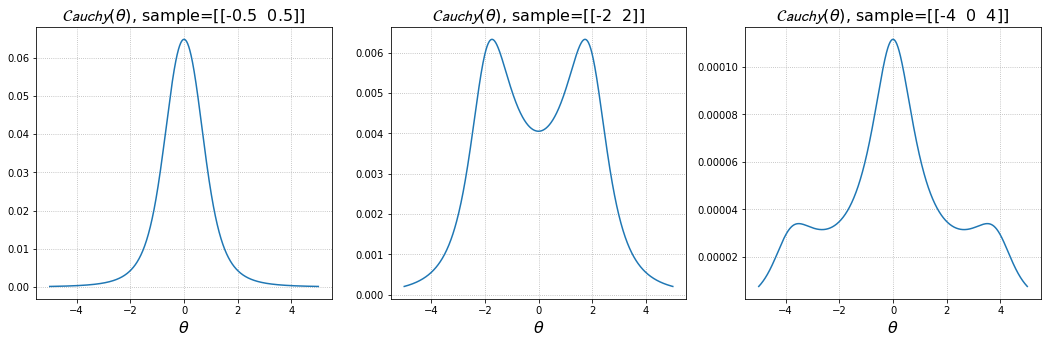

In [6]:
draw_likelihood(sps.expon(loc=grid).pdf, grid, [[1, 2], [0.1, 1.0], [1, 10]], '$\\mathcal{Exp}(\\theta)$')
draw_likelihood(sps.uniform(loc = 0, scale=grid).pdf, grid, [[0.2, 0.8], [0.5, 1.0], [0.5, 1.3]], '$\\mathcal{U}(0,\\theta)$')
draw_likelihood(sps.binom(n = 5, p=grid).pmf, grid, [[0, 1], [5, 5], [0, 5]], '$\\mathcal{Bin}(5,\\theta)$')
draw_likelihood(sps.poisson(mu=grid).pmf, grid, [[0, 1], [0, 10], [5, 10]], '$\\mathcal{Pois}(\\theta)$')
draw_likelihood(sps.cauchy(loc=grid).pdf, grid, [[-0.5, 0.5], [-2,2], [-4, 0, 4]], '$\\mathcal{Cauchy}(\\theta)$')

Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:**

<...>

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [7]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:Как видим, малое число питон округляет до нуля. Избежать этой проблемы можно, логарифмируя и получая большие отрицательные числа вместо малых **

<...>

In [8]:
print(sample[np.argmax(sample)])
print(sps.norm.pdf(4))
print(sps.norm.pdf(4)**100)


4.5245445693742985
0.00013383022576488537
0.0


__________________
### Задача 5

Загрузите данные об экспрессии гена FAM129A из файла `FAM129A.txt` с помощью функции `np.loadtxt`. Постройте гистограмму функцией `plt.hist`, указав в параметре `bins` оптимальное количество разбиений.

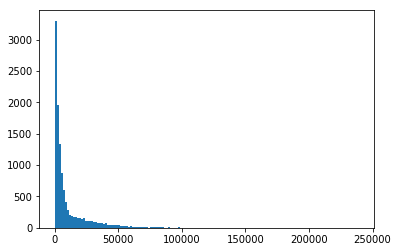

In [9]:
sample = np.loadtxt("FAM129A.txt")
plt.hist(sample, bins = 150)
plt.show()

В предположении, что данные имеют пуассоновское распределение, найдите оценку максимального правдоподобия параметра распределения. Нарисуйте график дискретной плотности полученного распределения и сравните его с гистограммой. Хорошо ли оценка распределения приближает данные?

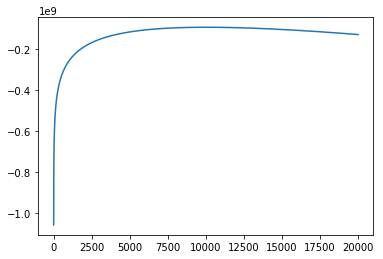

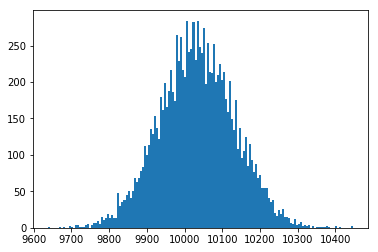

In [10]:
grid = np.linspace(0, 20000, 20001)
lglikehood = []
for i in range(20001):
    lglikehood.append(sps.poisson(grid[i]).logpmf(sample).sum())
plt.plot(grid,lglikehood)
plt.show()
a = np.argmax(lglikehood)
a
theory = sps.poisson(a).rvs(size = len(sample))
plt.hist(theory, bins = 150)
plt.show()

Как видим, теоретическая гистограмма распределения, выбранного по ММП с параметром а не схожа с гистограммой из файла, а значит распределение вряд ли Пуассоновское

__________________
### Задача 6
Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки a). $2\overline{X}, b). (n+1) \min_i X_i, c). \min_i X_i + \max_i X_i, d). \frac{n+1}{n} \max_i X_i$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом $0.01$ сгенерируйте $5000$ независимых выборок $X^1=\left(X^1_1, \dots, X^1_{100} \right), \dots, X^{5000} = \left(X^{5000}_1, \dots, X^{5000}_{100} \right)$ из распределения $U[0, \theta]$.

Рассмотрим одну из перечисленных выше оценок $\widehat{\theta}$. Посчитайте ее значение по каждой выборке. Тем самым, для данного $\theta$ получится $5000$ реализаций этой оценки $\widehat{\theta}_1, ..., \widehat{\theta}_{5000}$, где значение $\widehat{\theta}_j$ посчитано по реализации выборки $X^j$.

Теперь можно оценить функцию риска этой оценки с помощью усреднения
$$\widehat{R}_{\widehat{\theta}}(\theta) = \frac{1}{5000}\sum\limits_{j=1}^{5000} L\left(\widehat{\theta}_j, \theta\right),$$
где $L$ — одна из двух функций потерь: квадратичная $L(x, y)=(x-y)^2$ и линейная $L(x, y)=\left|x-y\right|$.

Для каждого из типов функций потерь постройте свой график. Нанесите на этот график для каждой из четырех оценок $\widehat{\theta}$ оценку функции потерь $\widehat{R}_{\widehat{\theta}}(\theta)$, пользуясь шаблоном ниже. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

*Совет*: при тестировании кода запускайте его с небольшими размерами данных. Например, используйте 100 реализаций выборок. Финальные результаты получите, поставив требуемые значения размеров данных.

In [11]:
plt.plot(<сетка по параметру>, <функция риска>,
         label=<latex-метка>)  # для каждой оценки
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}_{\\widehat{\\theta}}(\\theta)$', fontsize=16)
plt.legend(fontsize=14)
plt.title(<тип функции потерь>, fontsize=16)
plt.ylim((0, <ограничение сверху>))

SyntaxError: invalid syntax (<ipython-input-11-668417f80ce8>, line 1)

**Решение:**

In [ ]:
<...>

Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:** <...>